In [81]:

import numpy as np
from numpy.random import binomial
import pandas as pd

np.random.seed(42)
p_thresh = 0.5
N = 10
T = 100

# Generate random float values
random_values = np.random.rand(N, N)

# Create dataframe
df = pd.DataFrame(random_values)

# Apply binomial distribution to each cell in df
binomial_values = np.random.binomial(1, df.values)

# Create a new dataframe with binomial values
binomial_df = pd.DataFrame(binomial_values)

# Get indices where binomial_df is equal to one
indices = np.argwhere(binomial_df.values == 1)

binomial_df_repo = binomial_df.copy()

# Iterate over each time step
for t in range(T):
    # add time index level


    # ! WE DONT NEED THIS

    # Iterate over each index
    for index in indices:
        i, j = index[0], index[1]

        # Get the matching value from df
        matching_value = df.values[i, j]

        # Apply binomial distribution to neighbors
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if di == 0 and dj == 0:
                    continue

                ni, nj = i + di, j + dj

                # Check if neighbor indices are within bounds
                if 0 <= ni < N and 0 <= nj < N:
                    neighbor_value = df.values[ni, nj]

                    # Apply binomial distribution using matching value from df
                    connection_transmits = np.random.binomial(1, neighbor_value)

                    # Update binomial_df if connection transmits
                    if connection_transmits:
                        binomial_df.values[ni, nj] = 1

        # turn the on neurons off

        binomial_df.iloc[i, j] = 0


    # need to add time index here 
    binomial_df_repo = pd.concat([binomial_df_repo, binomial_df])


    # Update indices for the next time step
    indices = np.argwhere(binomial_df.values == 1)

    # Break the loop if no more connections are transmitting
    print(binomial_df)
    if len(indices) == 0:
        break


   0  1  2  3  4  5  6  7  8  9
0  1  1  1  1  1  0  0  1  1  1
1  0  1  1  0  1  0  0  1  0  0
2  1  0  1  1  1  1  1  1  1  0
3  0  0  0  1  1  1  1  0  1  0
4  0  1  0  1  1  1  0  1  1  0
5  1  1  1  1  1  0  0  1  1  0
6  1  1  1  1  1  1  1  1  1  1
7  1  1  0  1  1  1  1  1  1  1
8  0  1  0  0  1  1  1  0  1  1
9  0  1  1  0  0  1  1  0  0  0
   0  1  2  3  4  5  6  7  8  9
0  0  1  1  1  0  0  0  1  1  0
1  0  1  1  0  0  1  1  1  1  0
2  0  0  1  1  1  1  0  1  0  0
3  0  1  0  1  1  1  1  0  1  1
4  0  1  0  1  0  0  1  1  0  1
5  1  1  1  1  1  1  0  0  0  1
6  1  1  1  1  1  1  1  1  0  1
7  1  0  0  1  1  1  1  0  1  1
8  1  0  1  1  1  1  1  1  1  0
9  0  1  0  0  1  1  0  0  0  1
   0  1  2  3  4  5  6  7  8  9
0  1  1  1  1  0  0  1  1  1  1
1  0  1  1  1  0  1  1  1  0  0
2  1  1  0  1  1  1  1  1  1  0
3  1  0  1  1  1  1  1  1  0  0
4  1  1  0  1  1  1  0  0  1  1
5  1  1  1  1  1  1  0  1  0  1
6  0  1  1  1  1  1  0  1  0  1
7  1  0  0  1  1  1  1  1  1  0
8  0  1 

# Solution

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Power law model with toy neurons at the self-organized critical state.

T = 10000  # Time steps tracked.
N = 50  # Number of neurons in the network.

M = np.random.rand(N, N)  # Generate a random matrix M for neuron connections.
M2 = M / np.sum(M, axis=0)  # Normalize M so that each column sums to 1.
M2 = 0.98 * M2  # Scaling factor for the matrix, adjust the sigma. 1.0 = critical.

tv = np.zeros(T)  # Initialize the time step count array.
tov = np.zeros(T)  # Initialize the total activation count array.

noise_level = .3  # Adjust the noise level here (0.0 to 1.0)

neuron_activations = np.zeros((T, N))  # Initialize array to store neuron activations.

v1 = np.zeros(N)  # Initialize current voltage state.
v1[0] = 1  # Start with the first neuron activated.
total = 0  # Initialize the total activation count.

for i in range(T):  # Loop over each time step.
    total += np.sum(v1)

    # Add noise to the activity of each neuron
    v1_with_noise = v1 + np.random.normal(0, noise_level, N)

    v1 = np.dot((M2 > np.random.rand(N, N)), v1_with_noise) >= 1
    neuron_activations[i, :] = v1  # Store neuron activations at each timestep.


    tv[i] = i + 1  # Record the time step count for this iteration.
    tov[i] = total  # Record the total activation count.

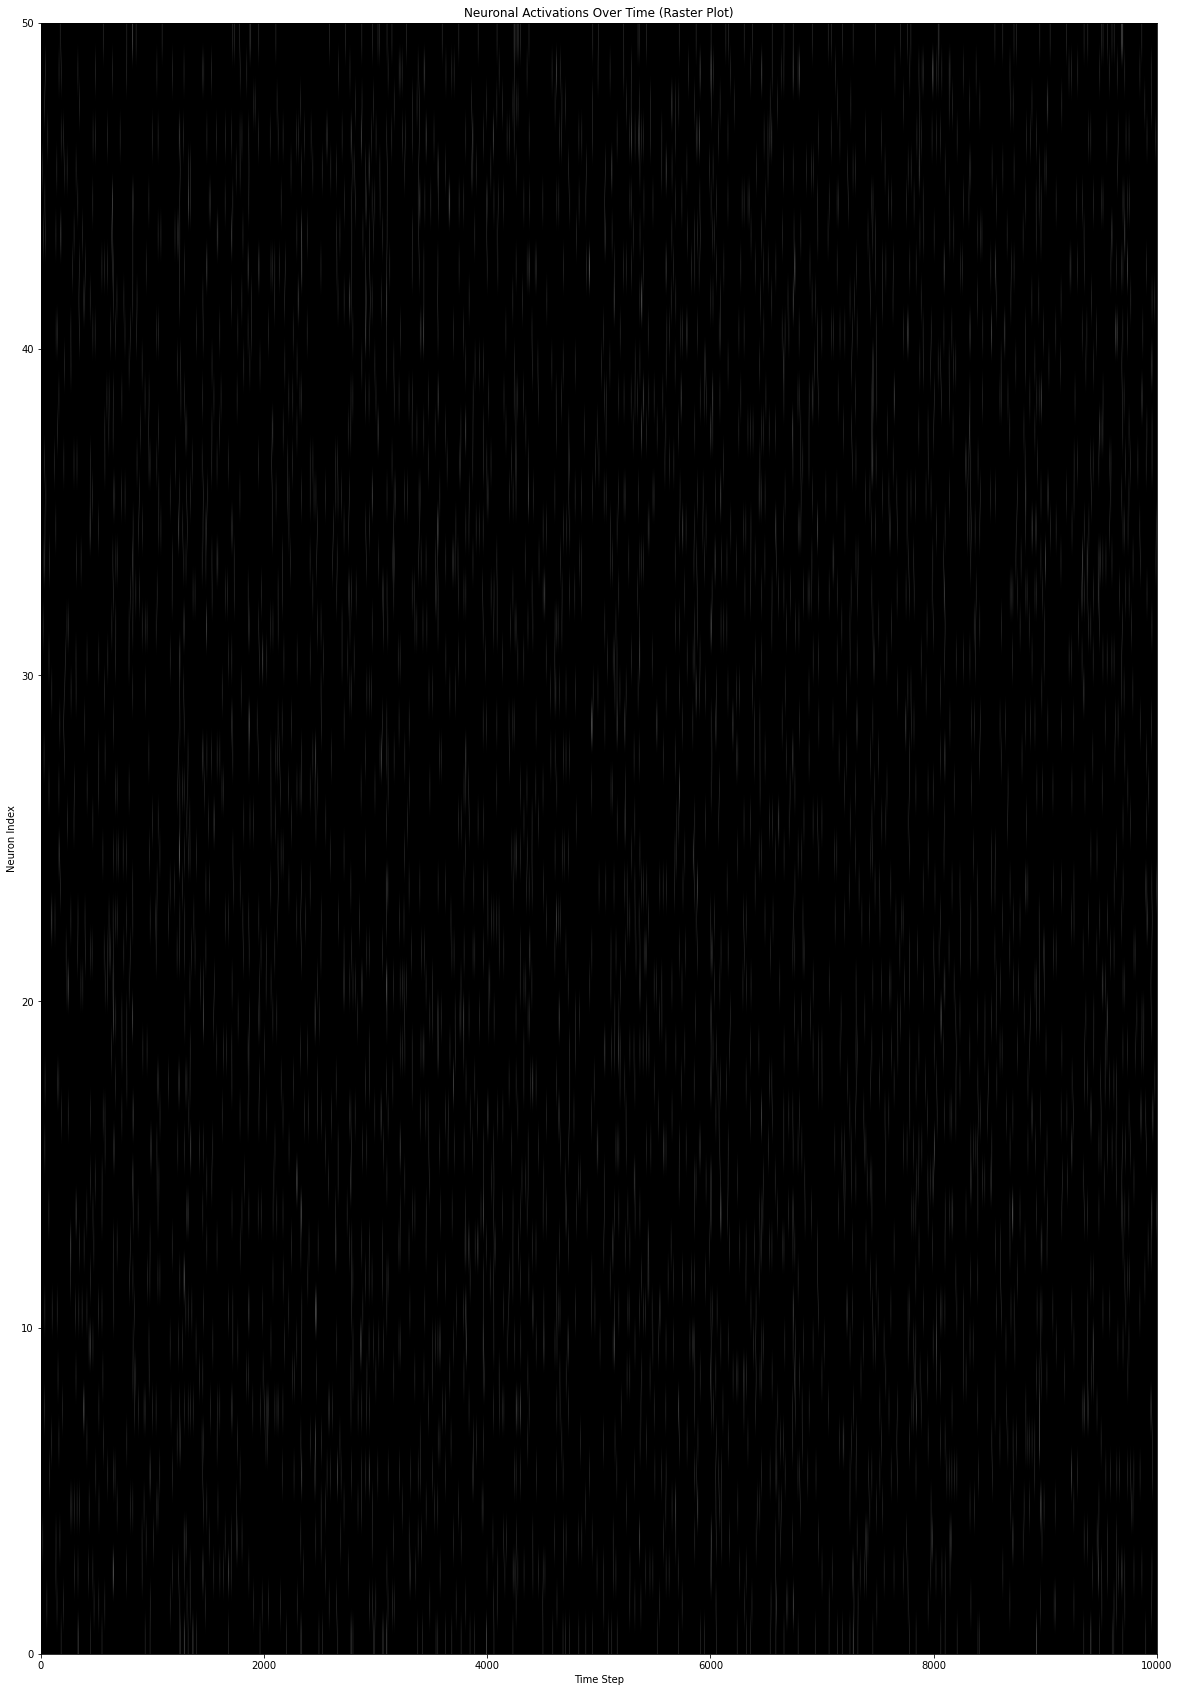

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# (Your modified code here...)

# Create a raster plot of neuronal activations over time
plt.figure(figsize=(20, 30))
plt.imshow(neuron_activations[:, :].T, cmap='gray', aspect='auto', extent=[0, T, 0, N])
plt.xlabel('Time Step')
plt.ylabel('Neuron Index')
plt.title('Neuronal Activations Over Time (Raster Plot)')

plt.show()
